<a href="https://colab.research.google.com/github/shaheerzubery/Ml-basic-Programs/blob/main/Underwater_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apply ML technique on Underwater data Set

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

## **Import data Set**

In [3]:
path = "/content/drive/MyDrive/underwater_temperature (1).csv"
Underwater = pd.read_csv(path, encoding = "unicode_escape")

Underwater.describe()

,ID,Latitude,Longitude,Temp (°C),Depth
count,408638.000000,408638.000000,408638.000000,408634.000000,408638.000000
mean,204319.500000,27.385022,48.432279,20.759051,12.010513
std,117963.773987,0.509617,0.096028,2.980158,6.177916
min,1.000000,26.367900,48.331000,14.421000,5.000000
25%,102160.250000,27.180400,48.385800,18.236000,5.000000
50%,204319.500000,27.270600,48.408000,20.615000,12.000000
75%,306478.750000,27.611100,48.522000,23.100000,12.000000
max,408638.000000,28.446100,48.708700,29.252000,22.100000


In [4]:
Underwater.head()

,ID,Latitude,Longitude,Date,Time,Temp (°C),Depth,Site
0,1,27.2706,48.331,2/20/2013,11:40:02,24.448,12.0,Ilha Deserta
1,2,27.2706,48.331,2/20/2013,12:00:03,24.448,12.0,Ilha Deserta
2,3,27.2706,48.331,2/20/2013,12:20:04,24.545,12.0,Ilha Deserta
3,4,27.2706,48.331,2/20/2013,12:40:05,24.448,12.0,Ilha Deserta
4,5,27.2706,48.331,2/20/2013,13:00:06,24.351,12.0,Ilha Deserta


## **Data Preprocessing**

In [5]:
import seaborn as sns
df = Underwater[['ID', 'Site', 'Latitude', 'Longitude', 'Depth', 'Temp (°C)']]

df

,ID,Site,Latitude,Longitude,Depth,Temp (°C)
0,1,Ilha Deserta,27.2706,48.3310,12.0,24.448
1,2,Ilha Deserta,27.2706,48.3310,12.0,24.448
2,3,Ilha Deserta,27.2706,48.3310,12.0,24.545
3,4,Ilha Deserta,27.2706,48.3310,12.0,24.448
4,5,Ilha Deserta,27.2706,48.3310,12.0,24.351
...,...,...,...,...,...,...
408633,408634,lha do Xavier,27.6092,48.3858,5.0,24.931
408634,408635,lha do Xavier,27.6092,48.3858,5.0,24.931
408635,408636,lha do Xavier,27.6092,48.3858,5.0,24.931
408636,408637,lha do Xavier,27.6092,48.3858,5.0,24.931


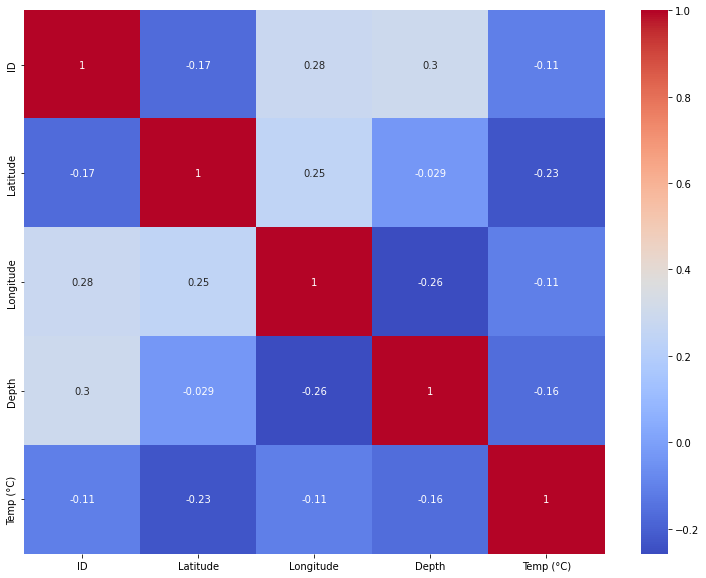

In [6]:
plt.figure(figsize = (13, 10))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.show()

Dealing with Nan

In [7]:
df.isna().any()

ID           False
Site         False
Latitude     False
Longitude    False
Depth        False
Temp (°C)     True
dtype: bool

In [8]:
# To find the rows containing NaN Values in the Temp column.
df[df['Temp (°C)'].isna()]


,ID,Site,Latitude,Longitude,Depth,Temp (°C)
119712,119713,Ilha da Galé,27.1719,48.408,12.0,NaN
119713,119714,Ilha da Galé,27.1719,48.408,12.0,NaN
119714,119715,Ilha da Galé,27.1719,48.408,12.0,NaN
119715,119716,Ilha da Galé,27.1719,48.408,12.0,NaN


In [9]:
df.loc[(df['Site'] == "Ilha da Galé") & (df['Depth'] == 12)]

,ID,Site,Latitude,Longitude,Depth,Temp (°C)
86152,86153,Ilha da Galé,27.1719,48.408,12.0,22.812
86153,86154,Ilha da Galé,27.1719,48.408,12.0,22.812
86154,86155,Ilha da Galé,27.1719,48.408,12.0,22.908
86155,86156,Ilha da Galé,27.1719,48.408,12.0,22.812
86156,86157,Ilha da Galé,27.1719,48.408,12.0,22.908
...,...,...,...,...,...,...
122385,122386,Ilha da Galé,27.1719,48.408,12.0,22.142
122386,122387,Ilha da Galé,27.1719,48.408,12.0,22.142
122387,122388,Ilha da Galé,27.1719,48.408,12.0,22.238
122388,122389,Ilha da Galé,27.1719,48.408,12.0,22.333


In [10]:
# As there is abundant data available, dropping the above 4 values seems like a good option.
df = df.drop([df.index[119712] , df.index[119713], df.index[119714], df.index[119715]])

In [15]:
# Creating initial dataframe
site_df = df['Site']

# generate binary values using get_dummies
dum_df = pd.get_dummies(site_df, columns=["Sites"])
site_df = site_df.to_frame()   # Changing it into a dataframe.

# Merge with main site_df on key values
site_df = site_df.join(dum_df)

# Merging with main df

df = df.drop(labels='Site', axis=1)
site_df = site_df.drop(labels='Tamboretes', axis=1)
df = df.join(site_df)

df = df[['ID', 'Latitude', 'Longitude', 'Depth', 'Ilha Deserta', 'Ilha da Galé', 'Ilha do Coral', 'Ilha dos Lobos',
       'Moleques do Sul', 'Parcel da Pombinha',
       'Parcel do Xavier (Alalunga)', 'lha do Xavier', 'Temp (°C)']]

df

ValueError: ignored

Data Engineering

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408634 entries, 0 to 408637
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           408634 non-null  int64  
 1   Latitude                     408634 non-null  float64
 2   Longitude                    408634 non-null  float64
 3   Depth                        408634 non-null  float64
 4   Temp (°C)                    408634 non-null  float64
 5   Ilha Deserta                 408634 non-null  uint8  
 6   Ilha da Galé                 408634 non-null  uint8  
 7   Ilha do Coral                408634 non-null  uint8  
 8   Ilha dos Lobos               408634 non-null  uint8  
 9   Moleques do Sul              408634 non-null  uint8  
 10  Parcel da Pombinha           408634 non-null  uint8  
 11  Parcel do Xavier (Alalunga)  408634 non-null  uint8  
 12  lha do Xavier                408634 non-null  uint8  
dtyp

In [17]:
x = df[['Latitude', 'Longitude', 'Depth', 'Ilha Deserta', 'Ilha da Galé', 'Ilha do Coral', 'Ilha dos Lobos', 'Moleques do Sul', 'Parcel da Pombinha', 'Parcel do Xavier (Alalunga)', 'lha do Xavier']]
y = df['Temp (°C)']

from sklearn.model_selection import train_test_split



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


x_train

,Latitude,Longitude,Depth,Ilha Deserta,Ilha da Galé,Ilha do Coral,Ilha dos Lobos,Moleques do Sul,Parcel da Pombinha,Parcel do Xavier (Alalunga),lha do Xavier
145580,27.9354,48.5451,12.0,0,0,1,0,0,0,0,0
6937,27.2706,48.3310,12.0,1,0,0,0,0,0,0,0
158859,27.9354,48.5451,12.0,0,0,1,0,0,0,0,0
403098,27.6092,48.3858,12.0,0,0,0,0,0,0,0,1
288872,27.6111,48.3882,22.1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
259182,27.1804,48.4097,22.0,0,0,0,0,0,1,0,0
365842,26.3679,48.5220,5.0,0,0,0,0,0,0,0,0
131936,27.1719,48.4080,5.0,0,1,0,0,0,0,0,0
146871,27.9354,48.5451,12.0,0,0,1,0,0,0,0,0


# **NORMALIZATION**

In [18]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
scale.fit(x_train)

x_train = scale.transform(x_train)
x_test = scale.transform(x_test)

**Apply different Machine learning Algorithms  **

In [19]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [20]:
pred = reg.predict(x_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
results

,Actual,Predicted
296649,16.999,19.517212
398808,16.046,20.556763
179674,23.869,20.018066
28780,25.028,22.140930
133030,19.092,20.686768
...,...,...
350830,25.805,22.145508
247924,23.677,20.170776
376111,19.948,20.556763
25237,21.091,22.140930


***Metrics used for its Accuracy***

In [21]:
 Linear_reg_acc= (reg.score(x_test, y_test))*100
 print(Linear_reg_acc)

12.916085332999305


*Apply another Model*

In [29]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x_train, y_train)

Lasso(alpha=0.1)

In [31]:
prediction = clf.predict(x_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
results

,Actual,Predicted
296649,16.999,20.263369
398808,16.046,20.412259
179674,23.869,20.138202
28780,25.028,21.723310
133030,19.092,20.711668
...,...,...
350830,25.805,20.961691
247924,23.677,20.458675
376111,19.948,20.412259
25237,21.091,21.723310


Accuracy metrics

In [32]:
 Lasso_reg_acc= (clf.score(x_test, y_test))*100
 print(Lasso_reg_acc)

9.094827984938513


*Apply Another model*

In [36]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(max_depth=16, random_state=0)
RFR.fit(x_train, y_train)

RandomForestRegressor(max_depth=16, random_state=0)

In [37]:
predict = RFR.predict(x_test)
result = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
result

,Actual,Predicted
296649,16.999,19.516959
398808,16.046,20.325579
179674,23.869,20.021555
28780,25.028,22.300499
133030,19.092,19.503579
...,...,...
350830,25.805,22.143704
247924,23.677,20.166986
376111,19.948,20.325579
25237,21.091,22.300499


In [40]:
 RFR_accuracy= (RFR.score(x_test, y_test))*100

In [41]:
print("Linear model accuracy", Linear_reg_acc, '\n' , 'Lasso Accuracy', Lasso_reg_acc, '\n', "Random forest", RFR_accuracy)

Linear model accuracy 12.916085332999305 
 Lasso Accuracy 9.094827984938513 
 Random forest 15.361409624352994
